In [1]:
from src_dir import *
import numpy as np

dim=30


x0=np.squeeze(np.zeros((dim,dim)))
A=mk_laplace_2d(dim,dim)

retrain_freq=1
e1 = 1e-3
e2 = 1e-5
nmax_iter = 50
restart   = 64


DomainL=-1.0
DomainR=1.0

x1=np.linspace(DomainL,DomainR,dim)
x2=np.linspace(DomainL,DomainR,dim)
X, Y = np.meshgrid(x1, x2, sparse=False, indexing='ij')

n_steps =100
InputDim=dim*dim
HiddenDim=dim*dim
OutputDim=dim*dim

In [2]:
from src_dir import *

# @nn_preconditioner(retrain_freq=retrain_freq, debug=True,InputDim=InputDim,HiddenDim=HiddenDim,HiddenDim2=HiddenDim2,OutputDim=OutputDim)
# def MLGMRES(A, b, x0, e, nmax_iter,IterErr0_sum,IterErr0,ProbCount,Add,restart,debug):
#     return GMRES(A, b, x0, e, nmax_iter,restart, debug)



@timer
@cnn_preconditionerOnline_timed_2DFlat(retrain_freq=retrain_freq, debug=True,InputDim=InputDim,HiddenDim=HiddenDim,OutputDim=OutputDim)
def MLGMRES(A, b, b_flat,x0, e, nmax_iter,ML_GMRES_Time_list,ProbCount,restart,debug,refine,blist,reslist,Err_list):
    return GMRES(A, b, x0, e, nmax_iter,restart, debug)



@timer
def GMRES_timed(A, b, x0, e, nmax_iter,restart,debug):
    return GMRES(A, b, x0, e, nmax_iter,restart, debug)

In [3]:
from src_dir import *



ML_GMRES_Time_list=[]

Err_list=[]
NonML_Err_List=[]

run_time_ML_list=[]
run_timeP1_ML_list=[]
run_timeP2_ML_list=[]

run_time_list=[]
GmresRunTimeOriginal=[]
GmresRunTimeOriginal2=[]

trainTime_list=[]


debug=True
refine1=False
refine2=True

blist=[]
reslist=[]

eps=0.0001

for ProbIdx in range(n_steps):

    b=(np.sin(ProbIdx)+eps)*X+(np.cos(ProbIdx)+eps)*Y
    b_flat=np.reshape(b.T,(1,-1),order='C').squeeze(0)
    b_norm=np.linalg.norm(b_flat)


    OutList1,run_time1_ML=MLGMRES(A, b/b_norm,b_flat/b_norm ,x0, e1, nmax_iter,ML_GMRES_Time_list,ProbIdx,restart,debug,refine1,blist,reslist,Err_list)  # normalize b for optimal NN performance.
    Out=OutList1[0]
    ML_GMRES_Time_list=OutList1[1]
    blist=OutList1[3]
    reslist=OutList1[4]
    Err_list=OutList1[5]

    OutList2,run_time2_ML=MLGMRES(A, b/b_norm,b_flat/b_norm,Out[-1], e2, nmax_iter,ML_GMRES_Time_list,ProbIdx,restart,debug,refine2,blist,reslist,Err_list)
    Out2=OutList2[0]
    ML_GMRES_Time_list=OutList2[1]
    trainTime_list.append(OutList2[2])
    blist=OutList2[3]
    reslist=OutList2[4]
    Err_list=OutList2[5]

    run_timeP1_ML_list.append(run_time1_ML)
    run_timeP2_ML_list.append(run_time2_ML)
    run_time_ML_list.append(run_time1_ML+run_time2_ML)
    



    NonML_Out1,run_time1=GMRES_timed(A, b/b_norm, x0, e1, nmax_iter,restart, debug)  # normalize b for optimal NN performance.
    NonML_Err=resid(A, NonML_Out1, b/b_norm)
    NonML_Err_List.append(NonML_Err[10])
   
    NonML_Out2,run_time2=GMRES_timed(A, b/b_norm, NonML_Out1[-1], e2, nmax_iter,restart, debug)  # normalize b for optimal NN performance.
    
    GmresRunTimeOriginal.append(run_time1)
    GmresRunTimeOriginal2.append(run_time2)
    run_time_list.append(run_time1+run_time2)
    
    print(ProbIdx)


run_time=sum(run_time_list)
run_time_ML=sum(run_time_ML_list)
trainTime_total=sum(trainTime_list)


print("Runtime of Non-decorated version is:")
print(run_time)

print("Runtime of MLGMRES decorator is:")
print(run_time_ML)


print("Runtime of training (backprop) is:")
print(trainTime_total)


0
1
Final loss: 9.879700883175246e-06
parameters 1620900
Initial Training
2
size 32
0.17473881249940393 0.4479473828491995
0.5252947650005808 0.4028099300003305 0.17473881249940393 0.44794738284919666
0.5252947650005808 0.4028099300003305 0.17473881249940393 0.44794738284919666
3
size 32
0.33582654849365723 0.4479473828491995
0.3722866370007978 0.4452321895005298 0.33582654849365723 0.3113430976743008
0.3722866370007978 0.4452321895005298 0.33582654849365723 0.3113430976743008
4
size 32
0.26274741950941893 0.4479473828491995
0.38280167799894116 0.42091700533395243 0.26274741950941893 0.3195042479474196
0.38280167799894116 0.42091700533395243 0.26274741950941893 0.3195042479474196
5
size 32
0.0596881324237648 0.4479473828491995
0.22206124199874466 0.42679436000010657 0.0596881324237648 0.25777092683416003
0.22206124199874466 0.42679436000010657 0.0596881324237648 0.25777092683416003
6
size 32
0.01138378139394624 0.4479473828491995
0.20738086699930136 0.3756110804997661 0.011383781393946

size 32
0.022311100669759134 0.4479473828491995
0.26572584499990626 0.2485315295998589 0.022311100669759134 0.025532742397516815
0.26572584499990626 0.2485315295998589 0.022311100669759134 0.025532742397516815
41
size 32
0.0055118812894832435 0.4479473828491995
0.20402949200069997 0.23777755839983 0.0055118812894832435 0.016276387456122615
0.20402949200069997 0.23777755839983 0.0055118812894832435 0.016276387456122615
42
size 32
0.02356640362792674 0.4479473828491995
0.21072116899995308 0.23513204807990407 0.02356640362792674 0.016164259506981807
0.21072116899995308 0.23513204807990407 0.02356640362792674 0.016164259506981807
43
size 32
0.0018420564552944839 0.4479473828491995
0.27052157999969495 0.2316907983199053 0.0018420564552944839 0.015936319247379836
0.27052157999969495 0.2316907983199053 0.0018420564552944839 0.015936319247379836
44
size 32
0.0008666867140375927 0.4479473828491995
0.19963855300011346 0.23306156063990785 0.0008666867140375927 0.015505307724221389
0.1996385530001

77
size 32
0.002500621494009039 0.4479473828491995
0.2253833900012978 0.22054059256013717 0.002500621494009039 0.009133170826951508
0.2253833900012978 0.22054059256013717 0.002500621494009039 0.009133170826951508
78
size 32
0.0051599172790119914 0.4479473828491995
0.19861474400022416 0.21944400536020112 0.0051599172790119914 0.007983228785197652
0.19861474400022416 0.21944400536020112 0.0051599172790119914 0.007983228785197652
79
size 32
0.0076756319984908295 0.4479473828491995
0.25542230599967297 0.21927272264023487 0.0076756319984908295 0.008149675201735916
0.25542230599967297 0.21927272264023487 0.0076756319984908295 0.008149675201735916
80
size 32
0.007344860089290564 0.4479473828491995
0.2563071820004552 0.2213716079202277 0.007344860089290564 0.008402414806797326
0.2563071820004552 0.2213716079202277 0.007344860089290564 0.008402414806797326
81
size 32
0.010466069571041908 0.4479473828491995
0.26130204499895626 0.22143521736019467 0.010466069571041908 0.007649860596451962
0.26130

In [4]:
import matplotlib.pyplot as pp
from src_dir import *

Text(0.5, 1.0, 'Coarse call run time')

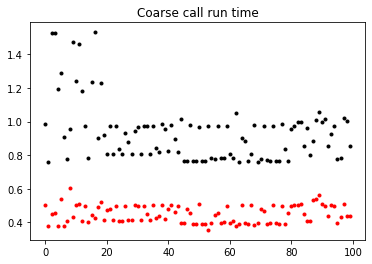

In [5]:
pp.plot(run_timeP1_ML_list,'.k',GmresRunTimeOriginal,'.r')
pp.title('Coarse call run time')

Text(0.5, 1.0, 'Refine call run time')

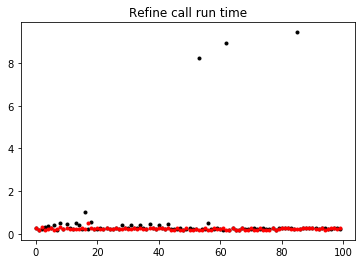

In [6]:
pp.plot(run_timeP2_ML_list,'.k',GmresRunTimeOriginal2,'.r')
pp.title('Refine call run time')
# pp.ylim((0, 0.2))

/home/kl748/Research/NERSC/GMRES-Learning/src_dir/util.py:65: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(a[-Window-1:-1])/Window


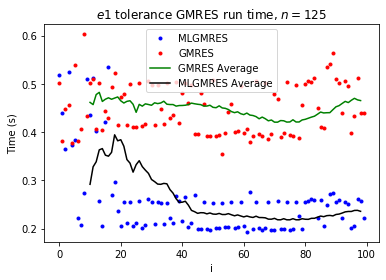

In [7]:
GmresRunTimeOriginal_AVG=np.zeros((n_steps,1))
ML_GMRES_Time_AVG=np.zeros((n_steps,1))
count=np.arange(0,n_steps)


for j in range(0,n_steps):
    GmresRunTimeOriginal_AVG[j]=moving_average(np.asarray(GmresRunTimeOriginal[:j]),j)

for j in range(0,n_steps):
    ML_GMRES_Time_AVG[j]=moving_average(np.asarray(ML_GMRES_Time_list[:j]),j)
    
    
pp.plot(ML_GMRES_Time_list,'.b',label='MLGMRES')
pp.plot(GmresRunTimeOriginal,'.r', label='GMRES')
pp.plot(count[10:-1],GmresRunTimeOriginal_AVG[10:-1],'g', label='GMRES Average')
pp.plot(count[10:-1],ML_GMRES_Time_AVG[10:-1],'k', label='MLGMRES Average')




pp.ylabel('Time (s)')
pp.xlabel('i')
pp.title('$e1$ tolerance GMRES run time, $n=125$')
pp.legend(loc='best')